In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
import fit_library_n

%matplotlib nbagg
%load_ext autoreload
%autoreload 2


In [2]:
# FITTING PROCEDURE
def fit_FBK_gain(data,voltage,n,gain_array,gainerr_array,bounds,param):
    x = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
    y = (data[voltage][:,1])/np.max(data[voltage][:,1])
    fit = fit_library_n.gaussn_least(x,y,n)
    out_param,perr = fit(bounds,*param)
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,fit.evaluate())
    print out_param
    print perr

    T_int = 400E-9
    GAIN  = 961
    pV = (out_param[1]/1E9) / T_int; pV_err = (perr[1]/1E9) / T_int
    I_i = pV / GAIN;                 I_i_err = pV_err / GAIN
    Q_i = I_i * T_int;               Q_i_err = I_i_err * T_int
    GAIN_SiPM = Q_i / 1.602E-19;     GAIN_SiPM_err = Q_i_err / 1.602E-19
    print("SiPM GAIN = %e +- %e for VDC = %f" % (np.abs(GAIN_SiPM),np.abs(GAIN_SiPM_err),voltages_array[voltage]))
    gain_array[voltage]=GAIN_SiPM
    gainerr_array[voltage] = GAIN_SiPM_err
    
    #return GAIN

# Read histogram data from OSCILLOSCOPE

In [3]:
#data=np.array([]).reshape(201,0)
data=[]
filenames=['VDD_365_G961.dat','VDD_370_G961.dat',
           'VDD_375_G961.dat','VDD_380_G961.dat',
           'VDD_385_G961.dat','VDD_390_G961.dat']
voltages_array = np.array([36.5,37.0,37.5,38.0,38.5,39.0])
gain_array = np.zeros(6)
gainerr_array = np.zeros(6)
for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_RT/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

VDD_365_G961.dat
VDD_370_G961.dat
VDD_375_G961.dat
VDD_380_G961.dat
VDD_385_G961.dat
VDD_390_G961.dat


# Data normalization and Selection

In [4]:
voltage=5
x5 = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
y5 = (data[voltage][:,1])/np.max(data[voltage][:,1])

# LEAST SQUARES METHOD

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 4.2532e+00, final cost 3.0348e-01, first-order optimality 1.60e-06.


<IPython.core.display.Javascript object>


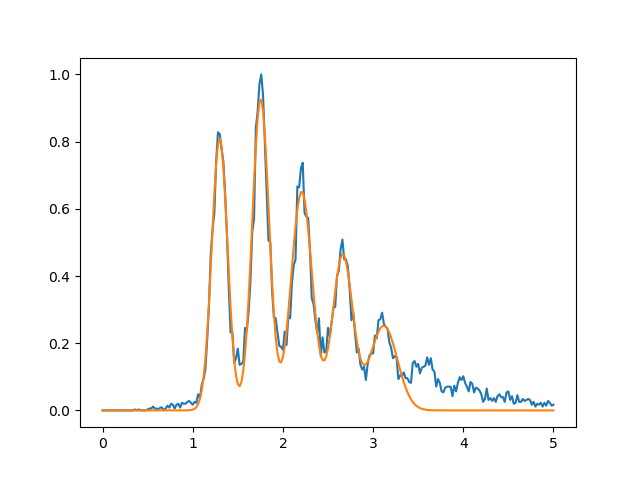

[ 1.29850484  0.45487096  0.80972296  0.92683928  0.65156977  0.46206528
  0.25196484  0.08688461  0.09326722  0.11601367  0.11101599  0.15      ]
[ 0.00233488  0.00180335  0.02172774  0.02106506  0.01908815  0.01936078
  0.01680049  0.00270411  0.00254172  0.00431792  0.00627202  0.01335909]


In [5]:
fit5 = fit_library_n.gaussn_least(x5,y5,5)
param_390 =[ 1.25, 0.42,  0.80, 0.95, 0.65, 0.45, 0.25, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_390=([1.0, 0.40,  0.75, 0.8, 0.50, 0.20, 0.12, 0.04, 0.04, 0.04, 0.04, 0.04],
            [1.3, 0.47,  1.00, 1.00, 0.80, 0.60, 0.30, 0.10, 0.10, 0.12, 0.12, 0.15])
out_param,perr = fit5(bounds_390,*param_390)
plt.figure(1)
plt.plot(x5,y5)
plt.plot(x5,fit5.evaluate())
print out_param
print perr


# GAIN

In [6]:
T_int = 400E-9
GAIN  = 961
pV = (out_param[1]/1E9) / T_int

I_i = pV / GAIN
Q_i = I_i * T_int

GAIN = Q_i / 1.602E-19
print("SiPM GAIN = %e for VDC = %f" % (np.abs(GAIN),voltages_array[voltage]))
gain_array[voltage]=GAIN

SiPM GAIN = 2.954625e+06 for VDC = 39.000000


# -------------------------------------------------------------
# -------------------------------------------------------------

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 4.2532e+00, final cost 3.0348e-01, first-order optimality 1.60e-06.


<IPython.core.display.Javascript object>


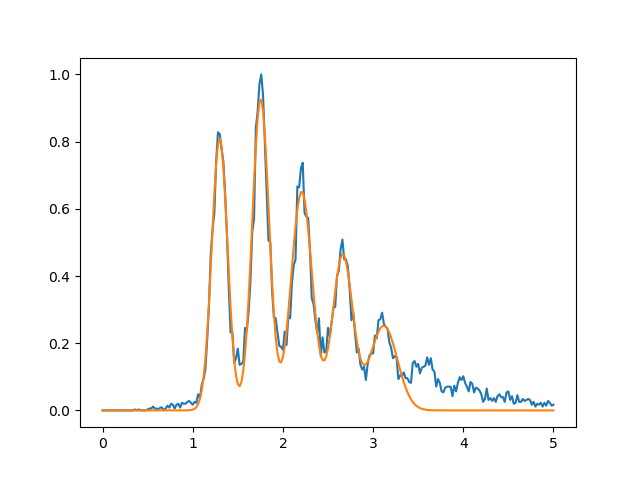

[ 1.29850484  0.45487096  0.80972296  0.92683928  0.65156977  0.46206528
  0.25196484  0.08688461  0.09326722  0.11601367  0.11101599  0.15      ]
[ 0.00233488  0.00180335  0.02172774  0.02106506  0.01908815  0.01936078
  0.01680049  0.00270411  0.00254172  0.00431792  0.00627202  0.01335909]
SiPM GAIN = 2.954625e+06 +- 1.171371e+04 for VDC = 39.000000


In [7]:
param_390 =[ 1.25, 0.42,  0.80, 0.95, 0.65, 0.45, 0.25, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_390=([1.0, 0.40,  0.75, 0.8, 0.50, 0.20, 0.12, 0.04, 0.04, 0.04, 0.04, 0.04],
            [1.3, 0.47,  1.00, 1.00, 0.80, 0.60, 0.30, 0.10, 0.10, 0.12, 0.12, 0.15])

fit_FBK_gain(data,5,5,gain_array,gainerr_array,bounds_390,param_390)

`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 1.7289e+00, final cost 1.4807e-01, first-order optimality 3.03e-06.


<IPython.core.display.Javascript object>


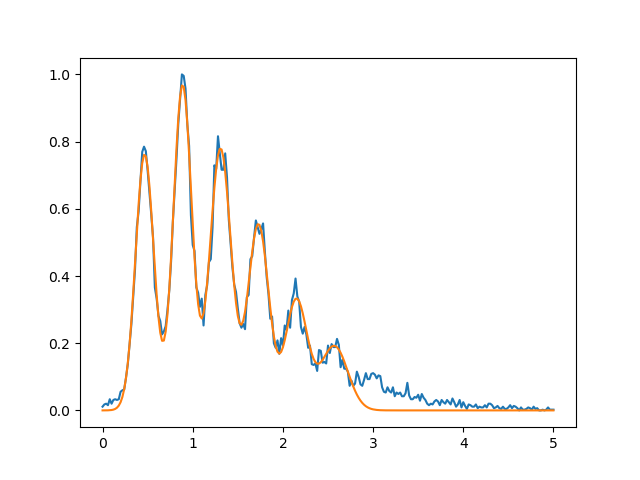

[ 0.46714715  0.42036685  0.76223226  0.96846425  0.77956379  0.55329164
  0.32891724  0.19174236  0.10178077  0.1019911   0.11748819  0.11471136
  0.12071502  0.15      ]
[ 0.00187688  0.00120415  0.01413781  0.01422371  0.01336029  0.01340352
  0.01316552  0.01169838  0.00231703  0.00200578  0.00292242  0.00417052
  0.00702443  0.01270902]
SiPM GAIN = 2.730502e+06 +- 7.821589e+03 for VDC = 38.500000


In [8]:

param_385 =[ 0.45, 0.42,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_385=([0.40,0.40,  0.10,0.10,0.10,0.10,0.10,0.10, 0.04,0.04,0.04,0.04,0.04,0.04],
            [0.50,0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])

fit_FBK_gain(data,4,6,gain_array,gainerr_array,bounds_385,param_385)


`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 1.6372e+00, final cost 4.4044e-01, first-order optimality 9.51e-06.


<IPython.core.display.Javascript object>


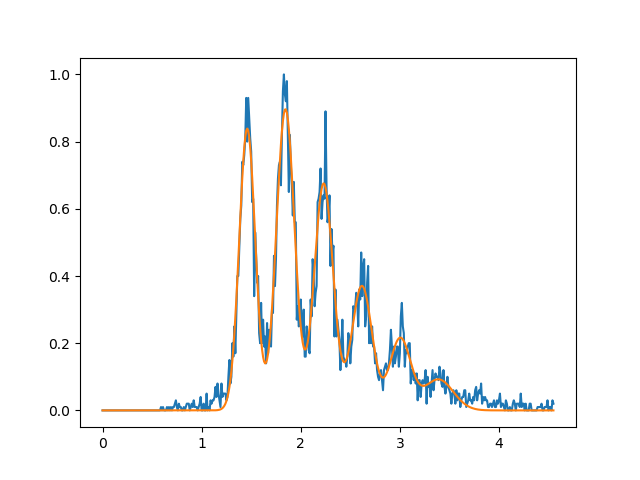

[ 1.46007213  0.38568135  0.8386112   0.89689388  0.67549425  0.3705062
  0.21292881  0.09230115  0.08057279  0.09126706  0.09486698  0.10237799
  0.10486527  0.14999999]
[ 0.00143821  0.00112197  0.01430212  0.0135699   0.01334281  0.01289029
  0.01294507  0.01062053  0.00162499  0.0017241   0.00246461  0.00494057
  0.00864889  0.02353493]
SiPM GAIN = 2.505202e+06 +- 7.287776e+03 for VDC = 38.000000


In [9]:
param_380 =[ 1.47, 0.40,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_380=([1.00,0.35,  0.05,0.05,0.05,0.05,0.05,0.05, 0.04,0.04,0.04,0.04,0.04,0.04],
            [1.55,0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])
fit_FBK_gain(data,3,6,gain_array,gainerr_array,bounds_380,param_380)

`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 7.2220e+00, final cost 1.2937e-01, first-order optimality 8.97e-06.


<IPython.core.display.Javascript object>


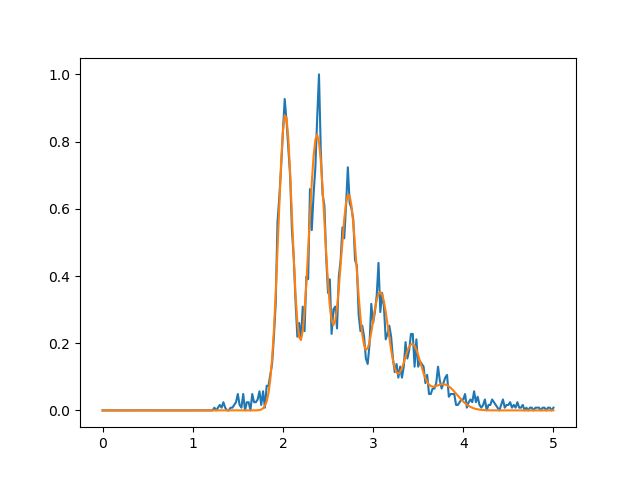

[ 2.02704663  0.35057719  0.88147507  0.82024769  0.64267366  0.35169694
  0.19236591  0.0773144   0.07856441  0.09284276  0.09522534  0.09849244
  0.10159966  0.14999917]
[ 0.00150164  0.00127488  0.01500516  0.01406015  0.01378411  0.0135446
  0.01424055  0.01111862  0.00164781  0.0022164   0.00297751  0.00572155
  0.01005476  0.02983325]
SiPM GAIN = 2.277182e+06 +- 8.281040e+03 for VDC = 37.500000


In [10]:
param_375 =[ 1.81, 0.40,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_375=([1.8,0.30,  0.05,0.05,0.05,0.05,0.05,0.05, 0.04,0.04,0.04,0.04,0.04,0.04],
            [2.1, 0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])
fit_FBK_gain(data,2,6,gain_array,gainerr_array,bounds_375,param_375)

`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 4.1503e+00, final cost 9.2017e-01, first-order optimality 3.03e-05.


<IPython.core.display.Javascript object>


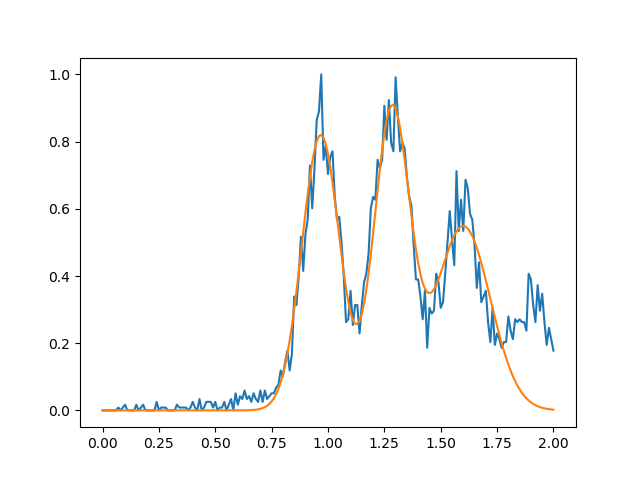

[ 0.96788767  0.31597769  0.81970551  0.89164736  0.54862146  0.0832884
  0.07889365  0.12      ]
[ 0.00369782  0.004655    0.03088583  0.03224547  0.02624474  0.00399883
  0.00461585  0.00921522]
SiPM GAIN = 2.052440e+06 +- 3.023664e+04 for VDC = 37.000000


In [11]:
param_370 =[0.90, 0.40,  
            0.80, 0.95, 0.65,  
            0.08, 0.08, 0.08]
bounds_370=([0.75,0.20, 0.05,0.05,0.05, 0.04,0.04,0.04],
            [1.00,0.47, 1.00,1.00,1.00, 0.12,0.12,0.12])
fit_FBK_gain(data,1,3,gain_array,gainerr_array,bounds_370,param_370)

`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 6.9724e+00, final cost 6.1004e-01, first-order optimality 7.35e-06.


<IPython.core.display.Javascript object>


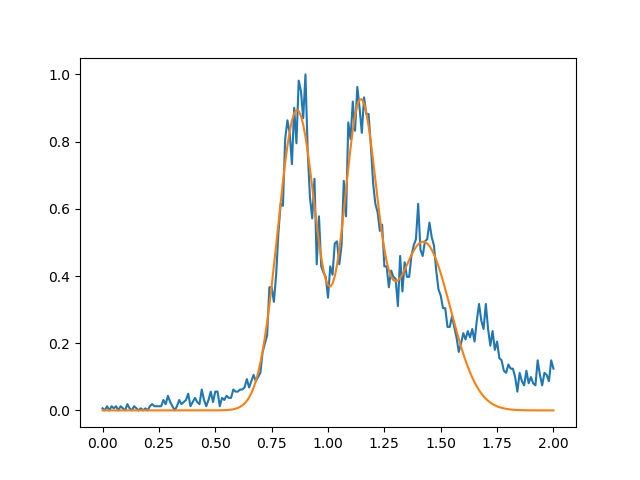

[ 0.86264863  0.28009981  0.89381807  0.89004247  0.50166613  0.08474961
  0.07292879  0.12      ]
[ 0.00314869  0.0044446   0.02503912  0.02970373  0.02140574  0.00325739
  0.00399598  0.00939571]
SiPM GAIN = 1.819395e+06 +- 2.887002e+04 for VDC = 36.500000


In [12]:
param_365 =[0.90, 0.40,  
            0.80, 0.95, 0.65,  
            0.08, 0.08, 0.08]
bounds_365=([0.75,0.20, 0.05,0.05,0.05, 0.04,0.04,0.04],
            [1.00,0.47, 1.00,1.00,1.00, 0.12,0.12,0.12])
fit_FBK_gain(data,0,3,gain_array,gainerr_array,bounds_365,param_365)

In [13]:
coeff_lin, perr_lin, XI2_r = fit_library_n.line_fit(gain_array,voltages_array,gainerr_array,'','','',1,0)


Max Linearity Error = 0.190%


Max Linearity Error = 0.190%


<IPython.core.display.Javascript object>


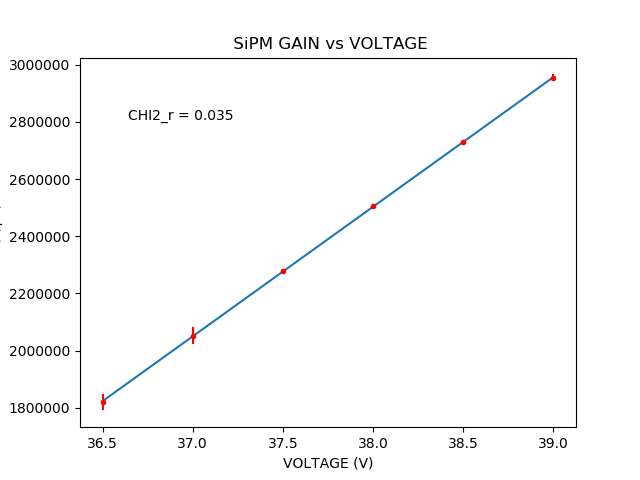

In [14]:
coeff_lin, perr_lin, XI2_r = fit_library_n.line_fit(gain_array,voltages_array,gainerr_array,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r)))
plt.errorbar(voltages_array,gain_array,fmt='r.',yerr=gainerr_array)
plt.plot(voltages_array,fit_library_n.line(voltages_array,coeff_lin[0],coeff_lin[1]))